In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

- **pandas**: Used for data manipulation and analysis.  
- **numpy**: Used for numerical operations.  
- **train_test_split**: Used to split the dataset into training and testing sets.  
- **DecisionTreeClassifier**: Used to create a decision tree classifier.  
- **accuracy_score**: Used to calculate the accuracy of the model.  
- **tree**: Used to visualize the decision tree.  
- **matplotlib.pyplot**: Used for plotting graphs.  

In [2]:
np.random.seed(42)
data_size = 200

Sets the random seed for reproducibility and defines the size of the dataset.

In [3]:
age = np.random.randint(18, 65, data_size)
income = np.random.randint(20000, 120000, data_size)
education_level = np.random.choice(["High School", "Bachelor", "Master", "PhD"], data_size)
owns_car = np.random.choice([0, 1], data_size)

Generates random values for age, income, education level, and car ownership

In [4]:
education_mapping = {"High School": 0, "Bachelor": 1, "Master": 2, "PhD": 3}
education_encoded = np.array([education_mapping[edu] for edu in education_level])

In [5]:
will_buy = np.random.choice([0, 1], data_size)

In [6]:
df = pd.DataFrame({
    "Age": age,
    "Income": income,
    "Education": education_encoded,
    "Owns_Car": owns_car,
    "Will_Buy": will_buy
})

In [7]:
df

,Age,Income,Education,Owns_Car,Will_Buy
0,56,72733,3,0,1
1,46,85318,0,1,0
2,32,109474,3,1,1
3,60,43664,0,1,0
4,25,87172,3,1,0
...,...,...,...,...,...
195,49,30647,2,0,0
196,49,28716,2,1,1
197,41,108891,0,1,0
198,58,107545,1,0,0


In [8]:
X = df.drop(columns=["Will_Buy"])
y = df["Will_Buy"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Splits the data into training (80%) and testing (20%) sets.

In [10]:
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [11]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.47


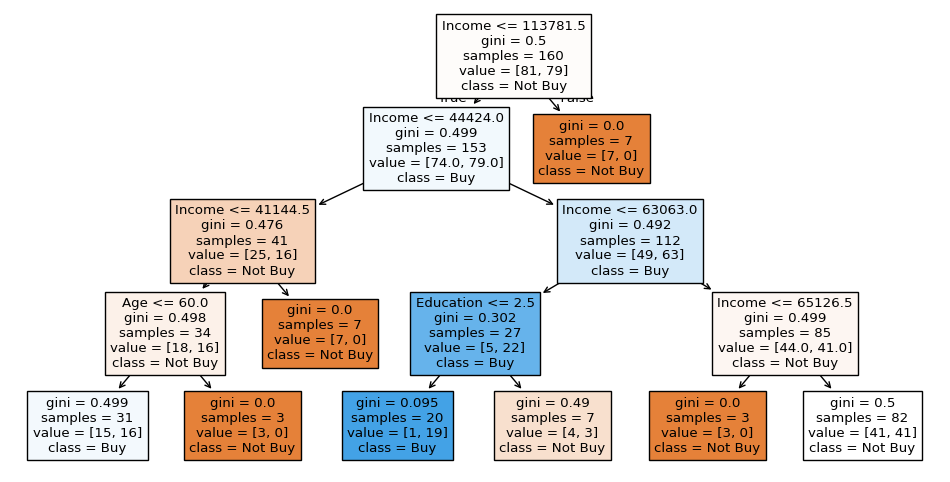

In [12]:
plt.figure(figsize=(12, 6))
tree.plot_tree(clf, feature_names=X.columns, class_names=["Not Buy", "Buy"], filled=True)
plt.show()

In [13]:
random_input = np.array([[25, 45000, 1, 1]])
random_prediction = clf.predict(random_input)
print(f"Prediction for random input (Age=25, Income=45000, Education=Bachelor, Owns Car): {random_prediction[0]}")

Prediction for random input (Age=25, Income=45000, Education=Bachelor, Owns Car): 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
